In [10]:
import os, sys
import django
sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import twitter.models as tm
from django.db.models import Sum, Count
from django.db.models.fields import DateField
from django.db.models.functions import Cast
import datetime

import matplotlib as mpl

mpl.rcParams['font.size'] = 6

dsize = 7.0866142

In [17]:
def tweet_time_graph(s, ax, years = None):
    if s.status_set.exists():
        statuses = s.status_set.all()
        if years:
            start = django.utils.timezone.make_aware(datetime.datetime.now()) - datetime.timedelta(days=years*365)
            statuses = statuses.filter(created_at__gt=start)
        
        byday = statuses.annotate(
            date_only=Cast('created_at', DateField())
        ).values('date_only').annotate(
            n = Count('pk')
        ).order_by('date_only')

        df = pd.DataFrame.from_dict(list(byday))

        df.head()

        df['date_only'] = pd.to_datetime(df['date_only'])

        df.plot('date_only','n', style=".", ax=ax, ms=3)
        ax.set_title(s.string)
        return df

## How many tweets do we have for each search term?


#ETS: 146008
most retweeted: 4235
Sedef Kabas - @SedefKabas - 2019-04-25 16:06:28+00:00
Dünya çapındaki karikatüristimiz Musa Kart, ETS Tur’u aradı diye FETÖcü olmakla suçlandı, yargılandı ve hapis cezasına çarptırıldı. Bugün cezaevine giriyor!  #ETS Tur FETÖcü ise  sahibi  Mehmet Ersoy nasıl Turizm Bakanı yapılıyor?Değilse neden konuşmuyor?   Adaleti SIFIR ettiniz!

#EUETS: 38912
most retweeted: 260
Ian Duncan - @IanDuncanHMG - 2016-06-24 11:06:09+00:00
I have tendered my resignation as rapporteur of the #EUETS phase IV reforms.  pic.twitter.com/XIjXh500sk

#Emissionshandel: 5820
most retweeted: 65
Brigitte Knopf - @BrigitteKnopf - 2019-05-13 05:48:55+00:00
Was bringt ein #CO2Preis? Was brächte der #Emissionshandel? Wo liegen die Probleme? Wie funktioniert eine #CO2Steuer? Wohin mit den Einnahmen? 
Das beantwortet @alexandraendres @zeitonline. Leseempfehlung für @akk @cducsubt und alle Interessierten https://t.co/h1PyFuCXwZ

#CO2Preis: 7079
most retweeted: 308
Jürgen Döschner - @jdoe

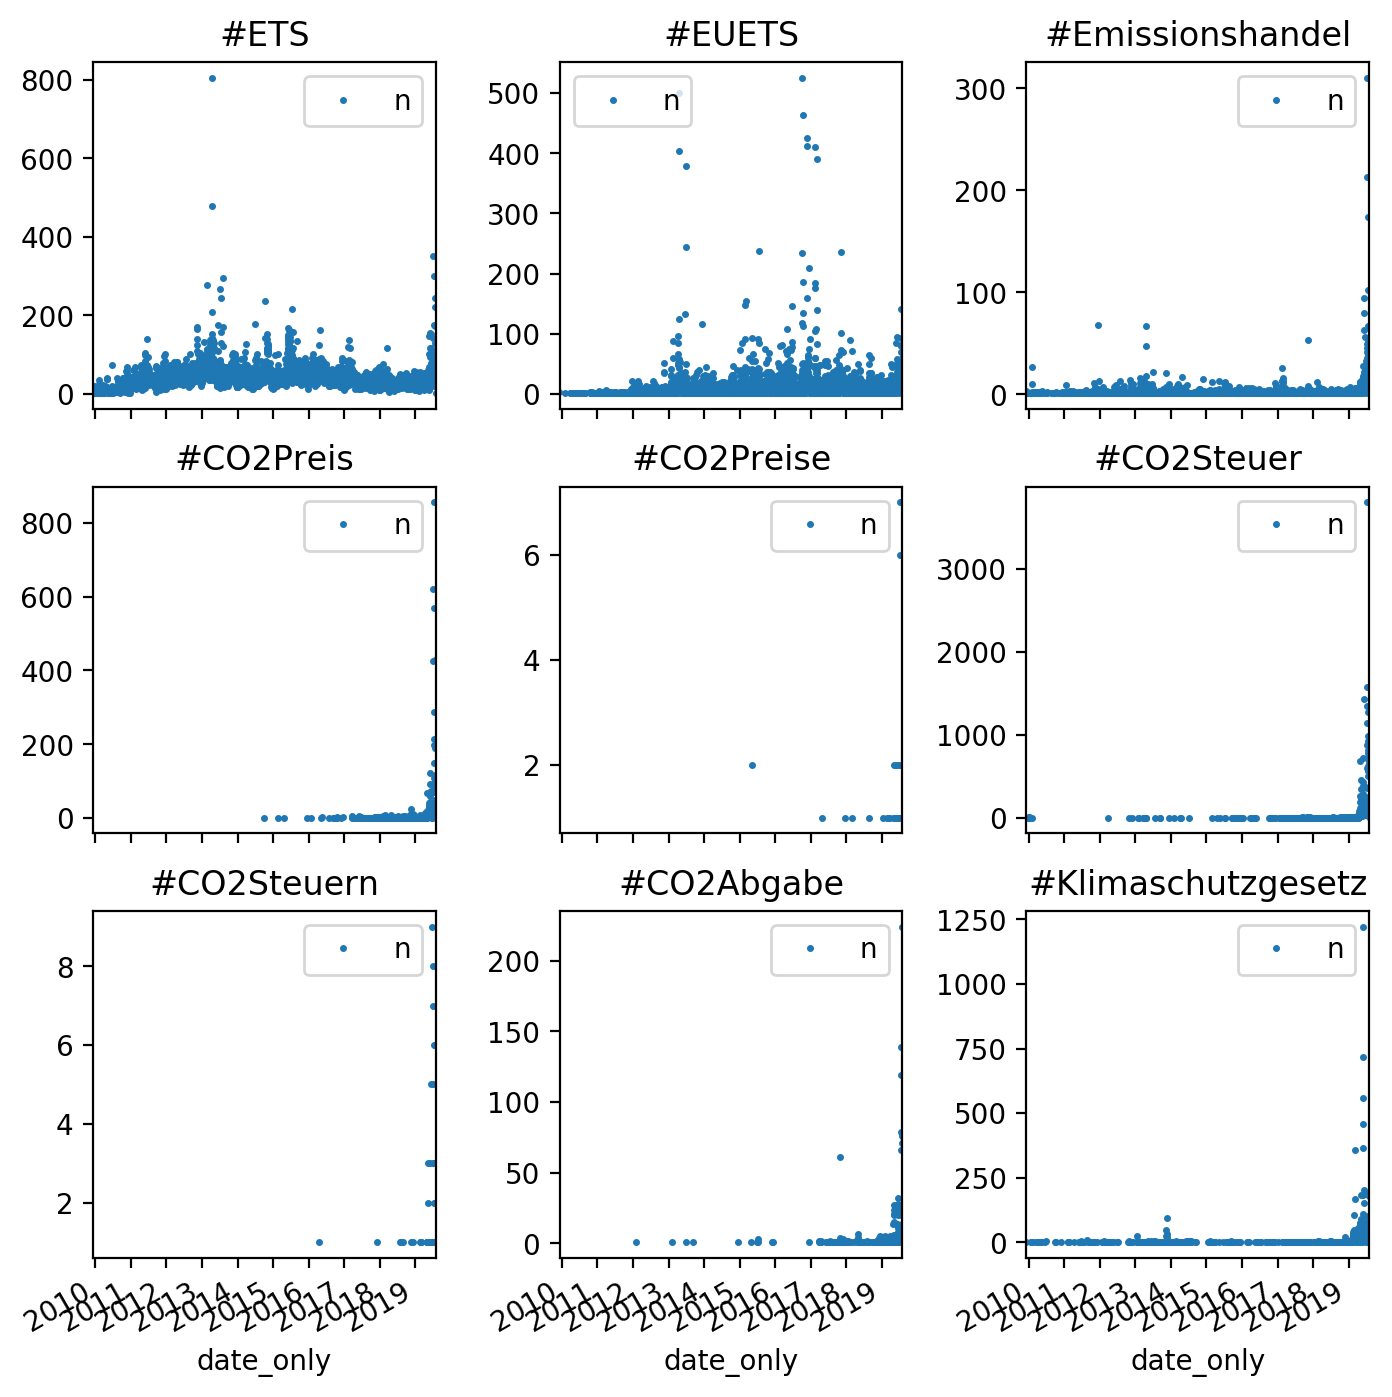

In [3]:
terms =  [
    '#ETS',
    '#EUETS',
    '#Emissionshandel',
    '#CO2Preis',
    '#CO2Preise',
    '#CO2Steuer',
    '#CO2Steuern',
    '#CO2Abgabe',
    '#Klimaschutzgesetz',
]

fig = plt.figure(dpi=200,figsize=(dsize,dsize))

i=0
fax = None
for t in terms:
    s, created = tm.TwitterSearch.objects.get_or_create(string=t)
    print(f"\n{s.string}: {s.status_set.count()}")
    if s.status_set.count() > 1:
        ms = s.status_set.order_by('-retweets_count').first()
        print(f"most retweeted: {ms.retweets_count}")
        print(f"{ms.author} - {ms.created_at}")
        print(ms.text)
        
        i+=1
        
        if fax:
            ax = fig.add_subplot(3,3,i,sharex=ax)
        else:
            ax = fig.add_subplot(3,3,i)
            fax = ax
        tweet_time_graph(s, ax)


plt.minorticks_off()
fig.tight_layout()



#ETS: 146008
most retweeted: 4235
Sedef Kabas - @SedefKabas - 2019-04-25 16:06:28+00:00
Dünya çapındaki karikatüristimiz Musa Kart, ETS Tur’u aradı diye FETÖcü olmakla suçlandı, yargılandı ve hapis cezasına çarptırıldı. Bugün cezaevine giriyor!  #ETS Tur FETÖcü ise  sahibi  Mehmet Ersoy nasıl Turizm Bakanı yapılıyor?Değilse neden konuşmuyor?   Adaleti SIFIR ettiniz!

#EUETS: 38912
most retweeted: 260
Ian Duncan - @IanDuncanHMG - 2016-06-24 11:06:09+00:00
I have tendered my resignation as rapporteur of the #EUETS phase IV reforms.  pic.twitter.com/XIjXh500sk

#Emissionshandel: 5820
most retweeted: 65
Brigitte Knopf - @BrigitteKnopf - 2019-05-13 05:48:55+00:00
Was bringt ein #CO2Preis? Was brächte der #Emissionshandel? Wo liegen die Probleme? Wie funktioniert eine #CO2Steuer? Wohin mit den Einnahmen? 
Das beantwortet @alexandraendres @zeitonline. Leseempfehlung für @akk @cducsubt und alle Interessierten https://t.co/h1PyFuCXwZ

#CO2Preis: 7079
most retweeted: 308
Jürgen Döschner - @jdoe

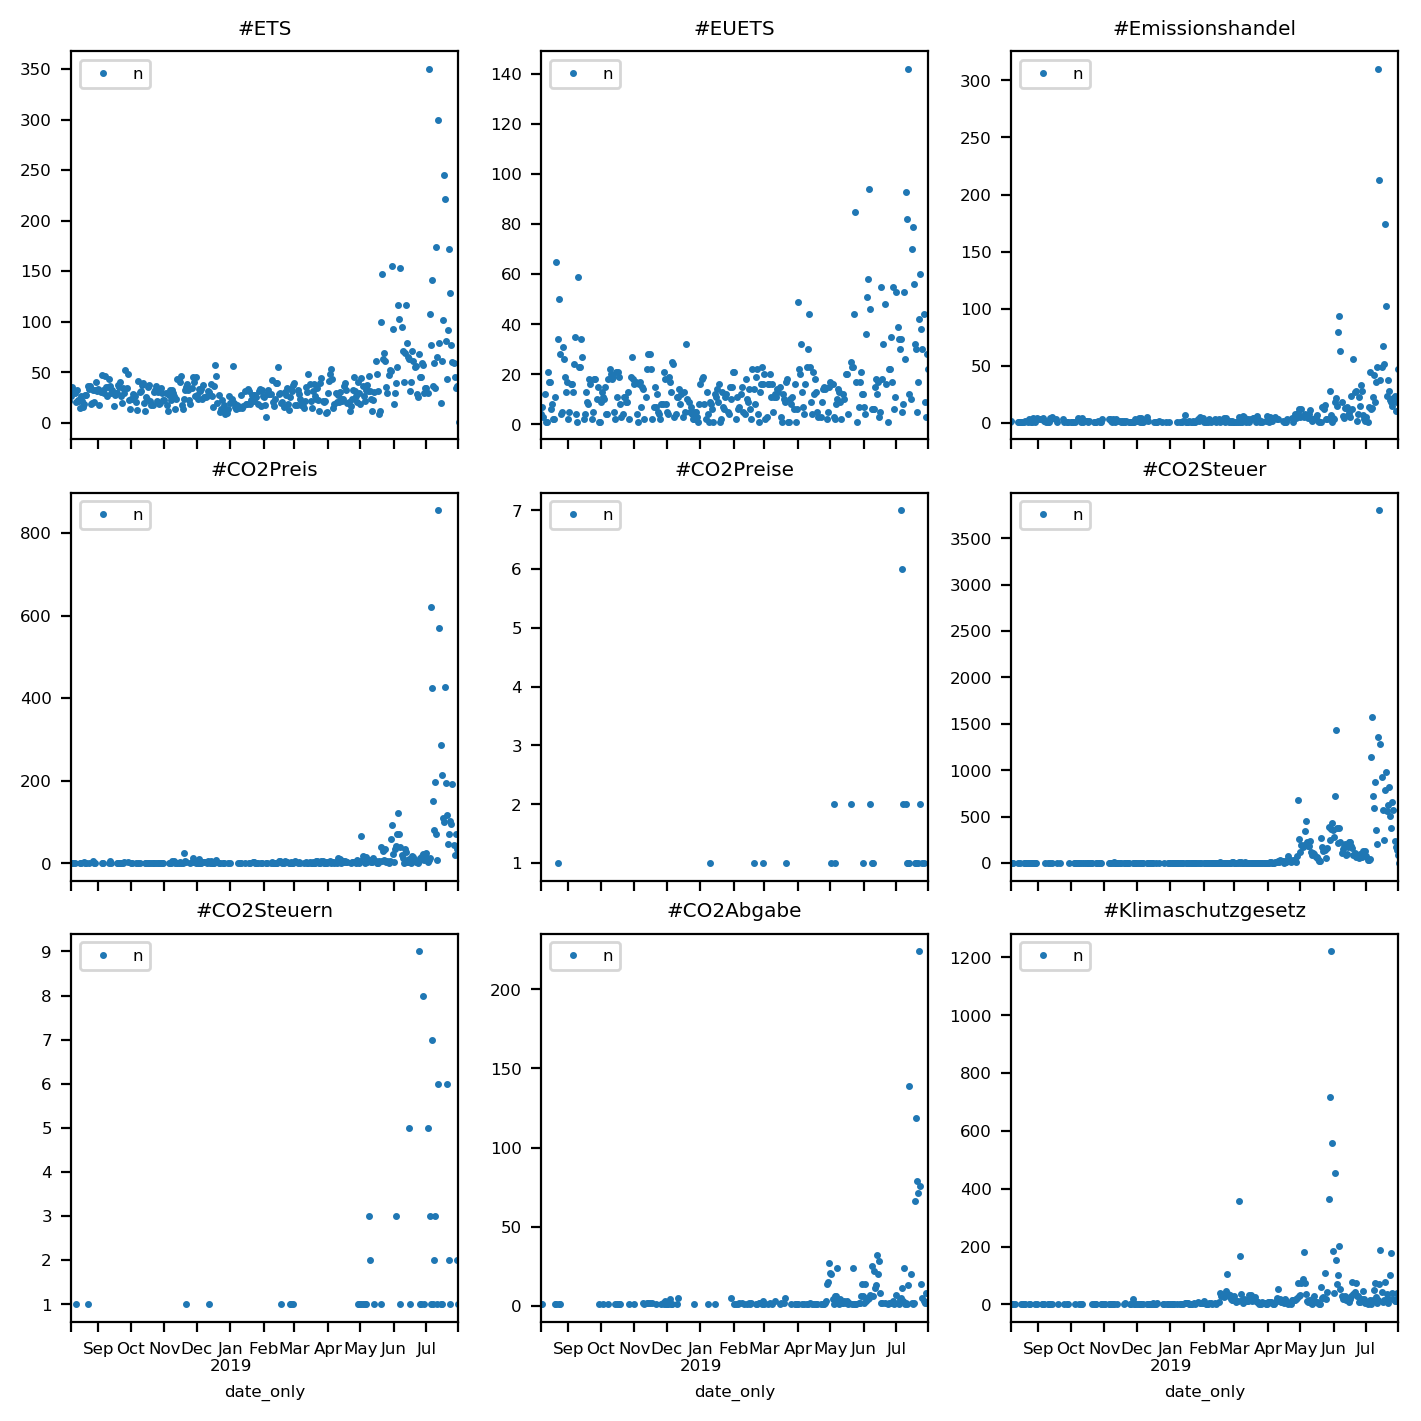

In [18]:
terms =  [
    '#ETS',
    '#EUETS',
    '#Emissionshandel',
    '#CO2Preis',
    '#CO2Preise',
    '#CO2Steuer',
    '#CO2Steuern',
    '#CO2Abgabe',
    '#Klimaschutzgesetz',
]

fig = plt.figure(dpi=200,figsize=(dsize,dsize))

i=0
fax = None
for t in terms:
    s, created = tm.TwitterSearch.objects.get_or_create(string=t)
    print(f"\n{s.string}: {s.status_set.count()}")
    if s.status_set.count() > 1:
        ms = s.status_set.order_by('-retweets_count').first()
        print(f"most retweeted: {ms.retweets_count}")
        print(f"{ms.author} - {ms.created_at}")
        print(ms.text)
        
        i+=1
        
        if fax:
            ax = fig.add_subplot(3,3,i,sharex=ax)
        else:
            ax = fig.add_subplot(3,3,i)
            fax = ax
        tweet_time_graph(s, ax, 1)


plt.minorticks_off()
fig.tight_layout()


## What are people tweeting about on the day that has the most tweets

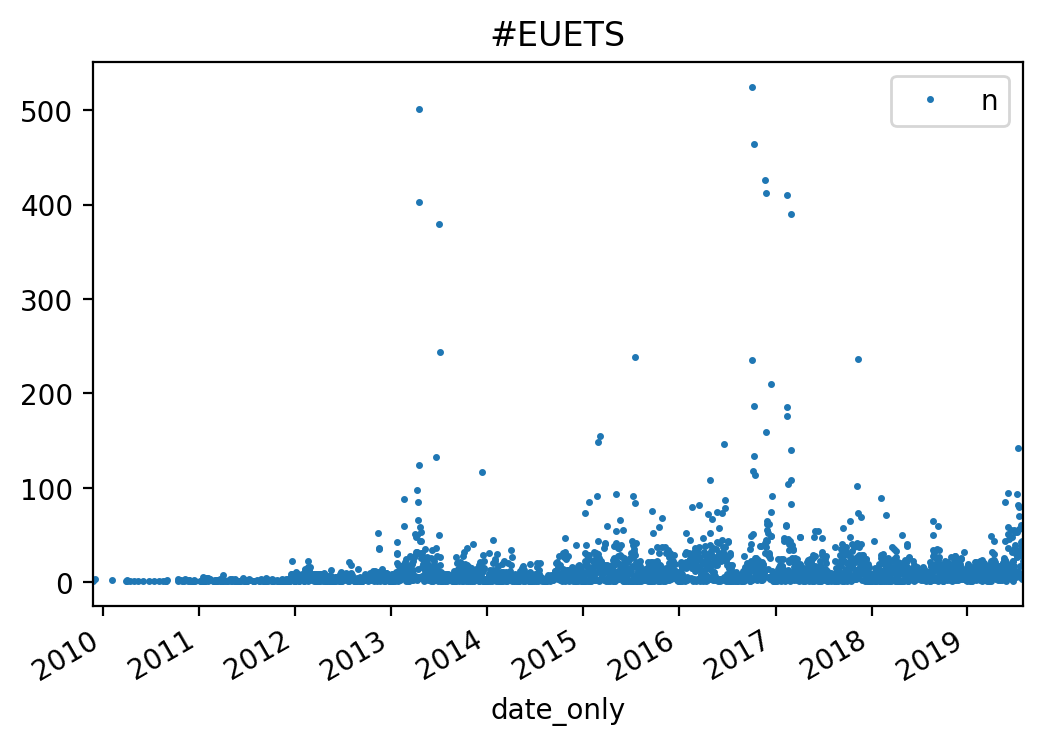

In [4]:
s = tm.TwitterSearch.objects.get(string="#EUETS")
fig, ax = plt.subplots(dpi=200)
df =  tweet_time_graph(s, ax)

In [5]:
max_date_tweets = s.status_set.annotate(
            date_only=Cast('created_at', DateField())
        ).filter(
        date_only=df.sort_values('n',ascending=False)['date_only'].iloc[4]
    )

for t in max_date_tweets.order_by('-retweets_count')[:10]:
    print(t.author)
    print(t.text)
    print(t.created_at)

CAN EUROPE - @CANEurope
Urge the #EU to make the polluters pay! Sign our petition and call on @EP_Environment to vote 4 strong #EUETS!  http://wemove.eu/ETS  pic.twitter.com/5yCCdS8XfA
2016-11-24 08:11:28+00:00
Ian Duncan - @IanDuncanHMG
More #EUETS shadows meetings needed next week. A deal is on the table - time for serious movement. @ecrgroup @ConMEPs
2016-11-24 16:22:23+00:00
Eurelectric - @eurelectric
The #Power Sector calls on EU legislators to adopt measures to #strengthen the #EUETS: https://t.co/kwmgo9Eey8 https://t.co/vFzWpq04qC
2016-11-24 11:30:13+00:00
WeMove.EU - @wemoveEU
In the world of #Trump, EU #climate action is more important than ever. MEPs, time for a strong #EUETS! Sign now!  http://tinyurl.com/zm7t8xj 
2016-11-24 11:05:24+00:00
WeMove.EU - @wemoveEU
Make the #polluters pay! We’re telling MEPs it’s time to keep the promise of #climateaction &amp; strong #EUETS! https://t.co/Rk9aJGyZVp
2016-11-24 09:56:57+00:00
EUROPEAN ALUMINIUM - @EU_Aluminium
Energy is aluminium

In [6]:
tm.Status.objects.filter(coordinates__isnull=False).first().coordinates

{'coordinates': [13.378985, 52.51807], 'type': 'Point'}

In [7]:
print(tm.Status.objects.filter(coordinates__isnull=False).count())
print(tm.Status.objects.filter(coordinates__isnull=True).count())

38275
26250439



Ulrike Schütt - @UlrikeSchuett
Nicht nur die #CO2Steuer ist Diebstahl. Die Hälfte unseres Einkommens (inkl. #Arbeitgeberbeitrag) sackt sich der „Staat“ schon per #Steuern und #Sozialabgaben ein. Danach 19% #MWSt, #GEZ, #KfzSteuer, Mineralölsteuer, #Ökosteuer. #Kleptokratie Und was macht er damit?!? #Idiokratie
2019-07-13 15:29:37+00:00

shortymatic. - @shortymatic
Deutsche Autobahn nach der #CO2Steuer.  pic.twitter.com/qPq8xhrHh8
2019-07-13 14:41:16+00:00

HAMBURG ONLINE 🌐 @HAMBURGonline News aus Hamburg - @HAMBURGonline
RT @meineStimmeDE: @Luisamneubauer Eure #Co2Steuer wird das Weltklima nicht um ein millionstel Grad ändern!

Ihr Naivlinge! Ihr fallt auf n…
2019-07-13 21:53:24+00:00

Raute des Grauens - @RauteDesGrauens
RT @Charles_Krueger: Wenn dumme Deutsche nach höheren Steuern betteln, obwohl Deutschland bereits mit die höchsten Steuern der Welt hat. 
#…
2019-07-13 21:52:40+00:00

Friedhelm_Staufer #QFD ❌ - @FriedhelmStauf2
RT @NaechsteRunde: "Die Einheit kostet uns keinen Pfenn

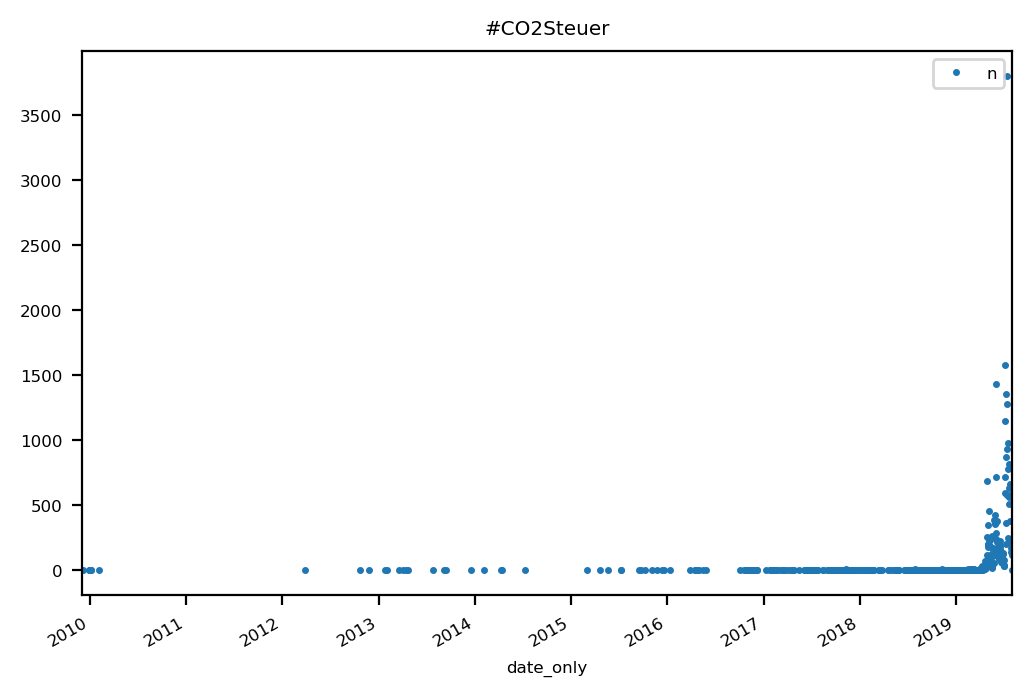

In [24]:
s = tm.TwitterSearch.objects.get(string="#CO2Steuer")

fig, ax = plt.subplots(dpi=200)
df =  tweet_time_graph(s, ax)


max_date_tweets = s.status_set.annotate(
            date_only=Cast('created_at', DateField())
        ).filter(
        date_only=df.sort_values('n',ascending=False)['date_only'].iloc[0]
    )



for t in max_date_tweets.order_by('-retweets_count')[:10]:
    print()
    print(t.author)
    print(t.text)
    print(t.created_at)